In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib as tpl

plt.rcParams['font.family'] = 'serif'

plt.rcParams['font.size']   = 12

In [2]:
PlotSize = (10, 10)

In [3]:
def numpyfy_dict(d):
    for k in d:
        d[k] = np.array(d[k])
    return d

def numpyfy_dict_of_dicts(d):
    for k in d:
        d[k] = numpyfy_dict(d[k])
    return d


In [4]:
# load the data for constant lambda, lambda error and lambda loss

lambda_ = 0.1
const_lambda_input_files = {
    "bootstrap_bootstrap" :f"../data/logistic/bootstrap_bootstrap_overlaps_lambda={lambda_}.json",
    "bootstrap_full"      :f"../data/logistic/bootstrap_full_overlaps_lambda={lambda_}.json",
    "full_full"           :f"../data/logistic/full_full_overlaps_lambda={lambda_}.json",
    "y_resampling"        :f"../data/logistic/y_resampling_overlaps_lambda={lambda_}.json",
    "residual_bootstrap"  :f"../data/logistic/residual_bootstrap_overlaps_lambda={lambda_}.json",
}
const_lambda_overlaps = { key : json.load(open(const_lambda_input_files[key], "r")) for key in const_lambda_input_files }
const_lambda_alpha_range = const_lambda_overlaps["full_full"]["alpha"]

lambda_error_input_files = {
    "bootstrap_bootstrap" : "../data/logistic/bootstrap_bootstrap_overlaps_lambda_error.json",
    "bootstrap_full"      : "../data/logistic/bootstrap_full_overlaps_lambda_error.json",
    "full_full"           : "../data/logistic/full_full_overlaps_lambda_error.json",
    "y_resampling"        : "../data/logistic/y_resampling_overlaps_lambda_error.json",
    "residual_bootstrap"  : "../data/logistic/residual_bootstrap_overlaps_lambda_error.json",
}
lambda_error_overlaps = { key : json.load(open(lambda_error_input_files[key], "r")) for key in lambda_error_input_files }
lambda_error_alpha_range = lambda_error_overlaps["bootstrap_bootstrap"]["alpha"]

# lambda_loss_input_files = {
#     "bootstrap_bootstrap" :"../data/logistic/bootstrap_bootstrap_overlaps_lambda_loss.json",
#     "bootstrap_full"      :"../data/logistic/bootstrap_full_overlaps_lambda_loss.json",
#     "full_full"           :"../data/logistic/full_full_overlaps_lambda_loss.json",
#     "y_resampling"        :"../data/logistic/y_resampling_overlaps_lambda_loss.json",
# }
# lambda_loss_overlaps = {
#     "bootstrap_bootstrap" :json.load(open(lambda_loss_input_files["bootstrap_bootstrap"], "r")),
#     "bootstrap_full"      :json.load(open(lambda_loss_input_files["bootstrap_full"], "r")),
#     "full_full"           :json.load(open(lambda_loss_input_files["full_full"], "r")),
#     "y_resampling"        :json.load(open(lambda_loss_input_files["y_resampling"], "r")),
# }
# lambda_loss_alpha_range                  =  lambda_loss_overlaps["full_full"]["alpha"]

# convert everything to numpy arrays
const_lambda_overlaps = numpyfy_dict_of_dicts(const_lambda_overlaps)
# lambda_loss_overlaps = numpyfy_dict_of_dicts(lambda_loss_overlaps)
lambda_error_overlaps = numpyfy_dict_of_dicts(lambda_error_overlaps)


---

# Constant $\lambda$

In [5]:
# BIAS OF ERM AND ITS ESTIMATION BY BOOTSTRAP

# store the bias of erm in full_full as we need these overlaps toc compute the bias
erm_bias            = 1.0 + const_lambda_overlaps["full_full"]["q_off_diag"] - 2 * const_lambda_overlaps["full_full"]["m"]
# erm_bias_estimation = const_lambda_overlaps["full_full"]["q_diag"] + const_lambda_overlaps["bootstrap_bootstrap"]["q_off_diag"] - 2 * const_lambda_overlaps["bootstrap_full"]["q_off_diag"]

plt.figure(figsize = PlotSize)

plt.plot(const_lambda_alpha_range, erm_bias, label="erm bias", )
# plt.plot(const_lambda_alpha_range, erm_bias_estimation, label="bootstrap bias estimation")
plt.yscale("log")

plt.grid()
plt.legend()

plt.xlabel("$n / d$")
plt.ylabel("Bias")

# tpl.save(f"../fig/logistic_regression_lambda={lambda_}_bias.tex")

ValueError: operands could not be broadcast together with shapes (96,) (39,) 

Text(0, 0.5, 'Variance')

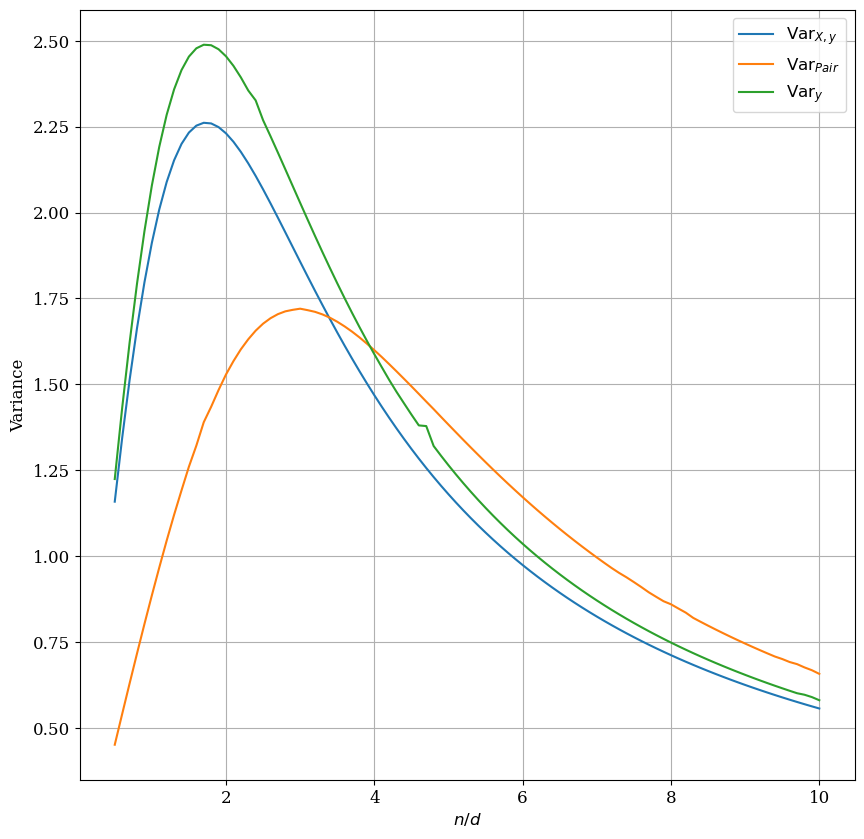

In [14]:
# VARIANCE OF THE RESAMPLING 

plt.figure(figsize=PlotSize)

const_lambda_overlaps["full_full"]["variance"] = const_lambda_overlaps["full_full"]["q_diag"] - const_lambda_overlaps["full_full"]["q_off_diag"]
const_lambda_overlaps["bootstrap_bootstrap"]["variance"] = const_lambda_overlaps["bootstrap_bootstrap"]["q_diag"] - const_lambda_overlaps["bootstrap_bootstrap"]["q_off_diag"]
const_lambda_overlaps["y_resampling"]["variance"] = const_lambda_overlaps["y_resampling"]["q_diag"] - const_lambda_overlaps["y_resampling"]["q_off_diag"]

plt.plot(const_lambda_alpha_range, const_lambda_overlaps["full_full"]["variance"], label="${\\rm Var}_{X, y}$")
plt.plot(const_lambda_alpha_range, const_lambda_overlaps["bootstrap_bootstrap"]["variance"], label="${\\rm Var}_{Pair}$")
plt.plot(const_lambda_alpha_range, const_lambda_overlaps["y_resampling"]["variance"], label="${\\rm Var}_{y}$")

plt.grid()
plt.legend()

plt.xlabel("$n / d$")
plt.ylabel("Variance")

# tpl.save(f"../fig/logistic_regression_lambda={lambda_}_variance.tex")

---

# Optimal $\lambda$ error

Text(0, 0.5, 'Bias')

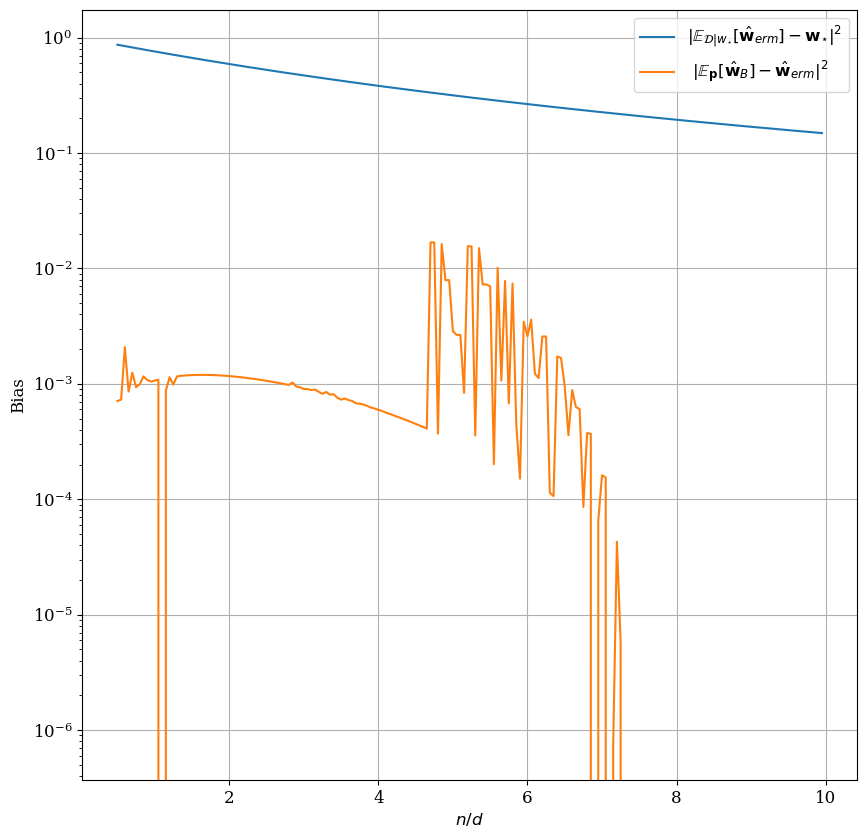

In [19]:
# BIAS OF ERM AND ITS ESTIMATION BY BOOTSTRAP

# store the bias of erm in full_full as we need these overlaps toc compute the bias
erm_bias            = 1.0 + lambda_error_overlaps["full_full"]["q_off_diag"] - 2 * lambda_error_overlaps["full_full"]["m"]
erm_bias_estimation = lambda_error_overlaps["full_full"]["q_diag"] + lambda_error_overlaps["bootstrap_bootstrap"]["q_off_diag"] - 2 * lambda_error_overlaps["bootstrap_full"]["q_off_diag"]

plt.figure(figsize = PlotSize)

plt.semilogy(lambda_error_alpha_range, erm_bias, label="$\| \mathbb{E}_{\mathcal{D} | w_{\star}} [ \hat{\mathbf{w}}_{erm}] - \mathbf{w}_{\star} \|^2 $", )
plt.semilogy(lambda_error_alpha_range, erm_bias_estimation, label=" $\| \mathbb{E}_{\mathbf{p}} [ \hat{\mathbf{w}}_{B}] - \hat{\mathbf{w}}_{erm}\|^2 $")

plt.grid()
plt.legend()

plt.xlabel("$n / d$")
plt.ylabel("Bias")

# tpl.save(f"../fig/logistic_regression_lambda={lambda_}_bias.tex")

Text(0, 0.5, 'Variance')

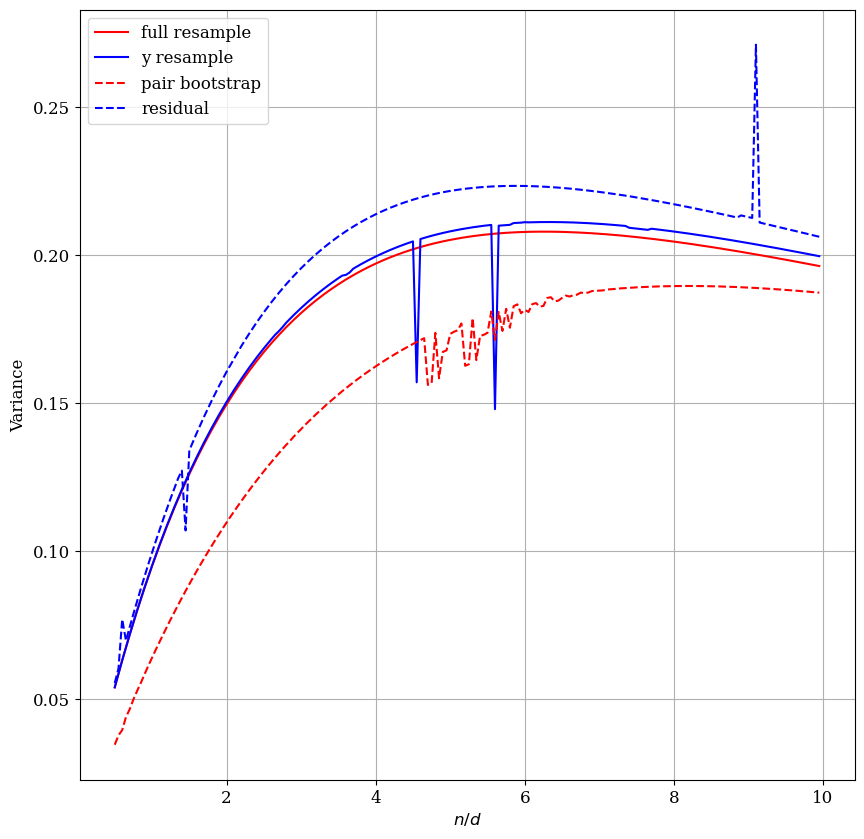

In [25]:
# VARIANCE OF THE RESAMPLING 

plt.figure(figsize=PlotSize)

lambda_error_overlaps["full_full"]["variance"] = lambda_error_overlaps["full_full"]["q_diag"] - lambda_error_overlaps["full_full"]["q_off_diag"]
lambda_error_overlaps["y_resampling"]["variance"] = lambda_error_overlaps["y_resampling"]["q_diag"] - lambda_error_overlaps["y_resampling"]["q_off_diag"]
lambda_error_overlaps["bootstrap_bootstrap"]["variance"] = lambda_error_overlaps["bootstrap_bootstrap"]["q_diag"] - lambda_error_overlaps["bootstrap_bootstrap"]["q_off_diag"]
lambda_error_overlaps["residual_bootstrap"]["variance"] = lambda_error_overlaps["residual_bootstrap"]["q_diag_residual"] - lambda_error_overlaps["residual_bootstrap"]["q_off_diag_residual"]

plt.plot(lambda_error_alpha_range, lambda_error_overlaps["full_full"]["variance"], 'r', label="full resample")
plt.plot(lambda_error_alpha_range, lambda_error_overlaps["y_resampling"]["variance"], 'b', label="y resample")
plt.plot(lambda_error_alpha_range, lambda_error_overlaps["bootstrap_bootstrap"]["variance"], 'r--', label="pair bootstrap")
plt.plot(lambda_error_alpha_range, lambda_error_overlaps["residual_bootstrap"]["variance"], 'b--', label='residual')

plt.grid()
plt.legend()

plt.xlabel("$n / d$")
plt.ylabel("Variance")

# tpl.save(f"../fig/logistic_regression_lambda={lambda_}_variance.tex")

--- 

# Optimal $\lambda$ loss

Text(0, 0.5, 'Bias')

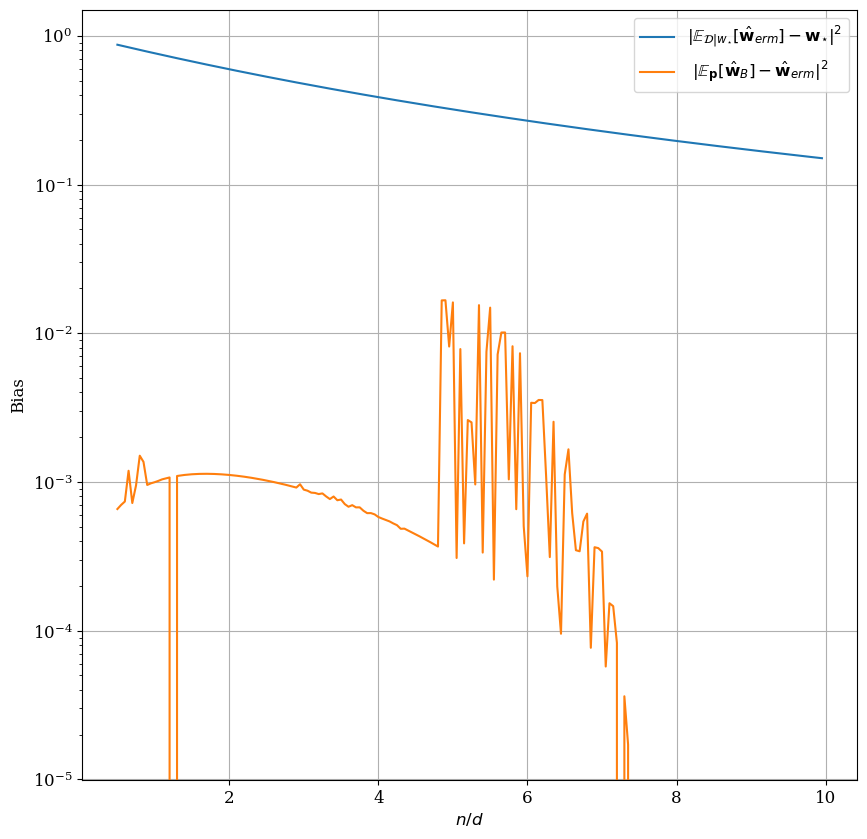

In [54]:
# BIAS OF ERM AND ITS ESTIMATION BY BOOTSTRAP

# store the bias of erm in full_full as we need these overlaps toc compute the bias
erm_bias            = 1.0 + lambda_loss_overlaps["full_full"]["q_off_diag"] - 2 * lambda_loss_overlaps["full_full"]["m"]
erm_bias_estimation = lambda_loss_overlaps["full_full"]["q_diag"] + lambda_loss_overlaps["bootstrap_bootstrap"]["q_off_diag"] - 2 * lambda_loss_overlaps["bootstrap_full"]["q_off_diag"]

plt.figure(figsize = PlotSize)

plt.semilogy(lambda_loss_alpha_range, erm_bias, label="$\| \mathbb{E}_{\mathcal{D} | w_{\star}} [ \hat{\mathbf{w}}_{erm}] - \mathbf{w}_{\star} \|^2 $", )
plt.semilogy(lambda_loss_alpha_range, erm_bias_estimation, label=" $\| \mathbb{E}_{\mathbf{p}} [ \hat{\mathbf{w}}_{B}] - \hat{\mathbf{w}}_{erm}\|^2 $")

plt.grid()
plt.legend()

plt.xlabel("$n / d$")
plt.ylabel("Bias")

# tpl.save(f"../fig/logistic_regression_lambda={lambda_}_bias.tex")

Text(0, 0.5, 'Variance')

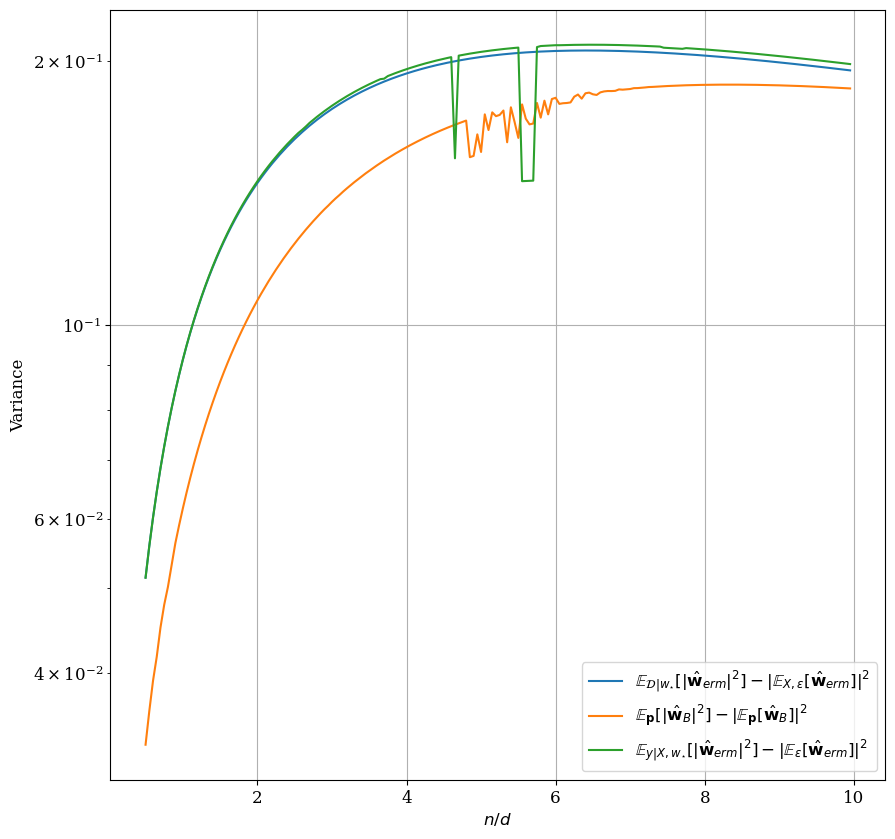

In [59]:
# VARIANCE OF THE RESAMPLING 

plt.figure(figsize=PlotSize)

lambda_loss_overlaps["full_full"]["variance"] = lambda_loss_overlaps["full_full"]["q_diag"] - lambda_loss_overlaps["full_full"]["q_off_diag"]
lambda_loss_overlaps["bootstrap_bootstrap"]["variance"] = lambda_loss_overlaps["bootstrap_bootstrap"]["q_diag"] - lambda_loss_overlaps["bootstrap_bootstrap"]["q_off_diag"]
lambda_loss_overlaps["y_resampling"]["variance"] = lambda_loss_overlaps["y_resampling"]["q_diag"] - lambda_loss_overlaps["y_resampling"]["q_off_diag"]

plt.semilogy(lambda_loss_alpha_range, lambda_loss_overlaps["full_full"]["variance"], label="$ \mathbb{E}_{\mathcal{D} | w_{\star}} [ \| \hat{\mathbf{w}}_{erm} \|^2 ]- \| \mathbb{E}_{X, \\varepsilon} [ \hat{\mathbf{w}}_{erm} ] \|^2 $")
plt.plot(lambda_loss_alpha_range, lambda_loss_overlaps["bootstrap_bootstrap"]["variance"], label="$ \mathbb{E}_{\mathbf{p}} [ \| \hat{\mathbf{w}}_{B} \|^2 ]- \| \mathbb{E}_{\mathbf{p}} [ \hat{\mathbf{w}}_{B} ] \|^2 $")
plt.plot(lambda_loss_alpha_range, lambda_loss_overlaps["y_resampling"]["variance"], label="$ \mathbb{E}_{y | X, w_{\star}} [ \| \hat{\mathbf{w}}_{erm} \|^2 ]- \| \mathbb{E}_{\\varepsilon} [ \hat{\mathbf{w}}_{erm} ] \|^2 $")

plt.grid()
plt.legend()

plt.xlabel("$n / d$")
plt.ylabel("Variance")

# tpl.save(f"../fig/logistic_regression_lambda={lambda_}_variance.tex")